## Observe Raw Data Sets
1. New York City Restaurant Inspection Results Dataset
2. Airbnb 2019 Rooms Datasets
3. NYC Boroughs
4. NYC Neighbourhoods

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

#### First look into the *New York City Restaurant Inspection Results* Dataset

In [2]:
raw_data = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [3]:
raw_data.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
dtype: object

In [4]:
raw_data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41598963,PADDY'S ON THE BAY,Bronx,50,PENNYFIELD AVENUE,10465.0,7184306651,American,02/03/2020,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Re-inspection,40.809911,-73.803584,210.0,13.0,11800.0,2079314.0,2.055290e+09,BX52
1,50009665,POCKET BAR NYC,Manhattan,455,WEST 48 STREET,10036.0,6466829062,American,07/26/2017,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.762877,-73.991380,104.0,3.0,12700.0,1026579.0,1.010580e+09,MN15
2,50089521,Xiang Dragon Chinese Restaurant,Manhattan,2331,1 AVENUE,10035.0,6463185423,Chinese,04/04/2019,Violations were cited in the following area(s).,...,11/23/2020,Pre-permit (Operational) / Initial Inspection,40.798178,-73.933821,111.0,8.0,19400.0,1054755.0,1.017960e+09,MN34
3,40402089,HENRY ST. ALE HOUSE,Brooklyn,62,HENRY STREET,11201.0,7185224801,American,04/19/2018,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.699108,-73.992221,302.0,33.0,100.0,3001647.0,3.002210e+09,BK09
4,50074331,KOME WAZA,Manhattan,1275,1 AVENUE,10065.0,6462885884,Hawaiian,04/30/2019,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.765664,-73.957568,108.0,5.0,11800.0,1044761.0,1.014430e+09,MN31


#### Second look into the *AirBnb NYC 2019* Dataset

In [5]:
airbnbRawData = pd.read_csv('AB_NYC_2019.csv')

In [6]:
airbnbRawData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
airbnbRawData.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
airbnbRawData.rename(columns={'neighbourhood_group':'Boro'}, inplace=True)

In [9]:
airbnbRawData.columns

Index(['id', 'name', 'host_id', 'host_name', 'Boro', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## Preprocessing data
### The following are what we have done in OpenRefine:
1. Filter out data with values *null* under column Longitude and Latitude.
    We have check is there any data only have either longitude or latitude. Fortunately, all of them are in the right way.
2. Filter out data with values *null* under column Grade.
3. Because we leave the grade, so we create a column called year based on the graded date.

4. Cluster the columns "STREET" and "DBA"

In [10]:
data = pd.read_csv('project_data.csv')

In [11]:
data.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                      int64
GRADE                     object
GRADE DATE                object
year                     float64
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                        int64
NTA                       object
dtype: object

In [12]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41598963,PADDY'S ON THE BAY,Bronx,50,PENNYFIELD AVENUE,10465.0,7184306651,American,02/03/2020,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Re-inspection,40.809911,-73.803584,210.0,13.0,11800.0,2079314.0,2055290425,BX52
1,40402089,HENRY ST. ALE HOUSE,Brooklyn,62,HENRY STREET,11201.0,7185224801,American,04/19/2018,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.699108,-73.992221,302.0,33.0,100.0,3001647.0,3002210027,BK09
2,50073295,HAVANA EXPRESS,Bronx,815,HUTCHINSON RIVER PARKWAY,10465.0,7185181800,Mexican,02/06/2018,Violations were cited in the following area(s).,...,11/23/2020,Pre-permit (Operational) / Initial Inspection,40.823678,-73.836420,210.0,13.0,9000.0,2080263.0,2055597501,BX09
3,41612554,DUNKIN',Bronx,3732,EAST TREMONT AVENUE,10465.0,3474787992,Café/Coffee/Tea,02/14/2018,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.826475,-73.822010,210.0,13.0,15200.0,2079944.0,2055430156,BX52
4,50044005,HAPPY GARDEN,Brooklyn,7211,3 AVENUE,11209.0,7187481113,Chinese,02/14/2017,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.633354,-74.027000,310.0,43.0,6600.0,3147329.0,3059080007,BK31


In [13]:
data.shape

(201190, 27)

In [14]:
data.CAMIS.unique().size

25749

In [15]:
data.describe()

,CAMIS,ZIPCODE,SCORE,year,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,2.011900e+05,197727.000000,201190.000000,198700.000000,201190.000000,201190.000000,197727.000000,197727.000000,197727.000000,1.968290e+05,2.011900e+05
mean,4.606710e+07,10678.979183,13.002997,2018.236376,40.027524,-72.670494,248.895958,20.058935,28864.028453,2.514571e+06,2.398246e+09
std,4.413468e+06,595.297028,8.669292,1.003895,5.297710,9.617573,130.683491,15.810061,30707.005709,1.351041e+06,1.347062e+09
min,3.011234e+07,10000.000000,-1.000000,2012.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.138363e+07,10022.000000,9.000000,2018.000000,40.685278,-73.989115,105.000000,4.000000,7900.000000,1.043149e+06,1.010360e+09
50%,5.000566e+07,10468.000000,12.000000,2018.000000,40.732431,-73.958289,301.000000,20.000000,16002.000000,3.007533e+06,3.001520e+09
75%,5.005739e+07,11229.000000,13.000000,2019.000000,40.761712,-73.897901,401.000000,34.000000,40304.000000,4.002051e+06,4.001620e+09
max,5.010623e+07,12345.000000,133.000000,2020.000000,40.912822,0.000000,503.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


In [16]:
data.drop('BUILDING', axis=1, inplace=True)
data.drop('PHONE', axis=1, inplace=True)
data.drop('Community Board', axis=1, inplace=True)
data.drop('Council District', axis=1, inplace=True)
data.drop('Census Tract', axis=1, inplace=True)
data.drop('BIN', axis=1, inplace=True)
data.drop('BBL', axis=1, inplace=True)
data.drop('NTA', axis=1, inplace=True)
data.drop('CRITICAL FLAG', axis=1, inplace=True)

In [17]:
data.columns

Index(['CAMIS', 'DBA', 'BORO', 'STREET', 'ZIPCODE', 'CUISINE DESCRIPTION',
       'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
       'SCORE', 'GRADE', 'GRADE DATE', 'year', 'RECORD DATE',
       'INSPECTION TYPE', 'Latitude', 'Longitude'],
      dtype='object')

### Now we can see that there are a lot of different dates. Choose which one is an issue.

We browse the dataset description website:
1. *INSPECTION DATE*: This field represents the date of inspection; NOTE: Inspection dates of 1/1/1900 mean an establishment has not yet had an inspection.
2. *GRADE DATE*: The date when the current grade was issued to the entity (restaurant).
3. *RECORD DATE*: The date when the extract was run to produce this data set.

Based on the information above, we use OpenRefine add a new column 'Inspection year'.

In [24]:
data2 = pd.read_csv('project_data2.csv')

In [25]:
data2.drop('BUILDING', axis=1, inplace=True)
data2.drop('PHONE', axis=1, inplace=True)
data2.drop('Community Board', axis=1, inplace=True)
data2.drop('Council District', axis=1, inplace=True)
data2.drop('Census Tract', axis=1, inplace=True)
data2.drop('BIN', axis=1, inplace=True)
data2.drop('BBL', axis=1, inplace=True)
data2.drop('NTA', axis=1, inplace=True)
data2.drop('CRITICAL FLAG', axis=1, inplace=True)
data2.drop('RECORD DATE', axis=1, inplace=True)

In [26]:
data2.columns

Index(['CAMIS', 'DBA', 'BORO', 'STREET', 'ZIPCODE', 'CUISINE DESCRIPTION',
       'INSPECTION DATE', 'Inspection_year', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'SCORE', 'GRADE', 'GRADE DATE', 'year',
       'INSPECTION TYPE', 'Latitude', 'Longitude'],
      dtype='object')

In [29]:
data2.isnull().sum()

CAMIS                       0
DBA                         0
BORO                        0
STREET                      0
ZIPCODE                  3463
CUISINE DESCRIPTION         0
INSPECTION DATE             0
Inspection_year             0
ACTION                      0
VIOLATION CODE            982
VIOLATION DESCRIPTION    1746
SCORE                       0
GRADE                       0
GRADE DATE               2490
year                     2490
INSPECTION TYPE             0
Latitude                    0
Longitude                   0
dtype: int64

In [60]:
data.isnull().sum()

CAMIS                       0
DBA                         0
BORO                        0
STREET                      0
ZIPCODE                  3463
CUISINE DESCRIPTION         0
INSPECTION DATE             0
ACTION                      0
VIOLATION CODE            982
VIOLATION DESCRIPTION    1746
SCORE                       0
GRADE                       0
GRADE DATE               2490
year                     2490
RECORD DATE                 0
INSPECTION TYPE             0
Latitude                    0
Longitude                   0
dtype: int64

### We can see that there exists difference from grade date and inpection date. So we use inspection year and inspection date as a time scale. And also no 1900 exists so we do not need to filter out any data.

In [30]:
data2.shape

(201190, 18)

In [31]:
raw_data.shape

(400046, 26)

### Now we can calculate the data quality in the dataset. This is not saying the data is bad, but the usage percentage in our project.

In [32]:
201190/400046

0.5029171645260795

In [52]:
data2['INSPECTION DATE'] = pd.to_datetime(data2['INSPECTION DATE'])

In [53]:
data2_asc = data2.sort_values(by=['INSPECTION DATE'])

In [54]:
inspection_trend = data2_asc['INSPECTION DATE'].value_counts(ascending=True)

Text(0, 0.5, 'Number of restaurants inspected')

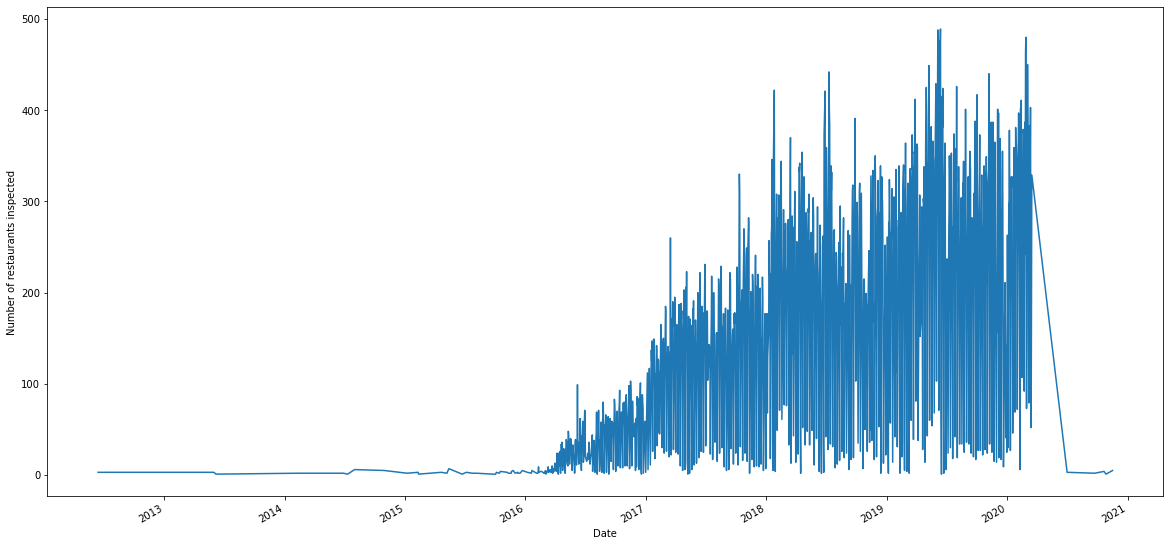

In [59]:
data2_asc['INSPECTION DATE'].value_counts(ascending=True).plot.line(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Number of restaurants inspected')

In [33]:
groupByCuisine = data2.groupby('CUISINE DESCRIPTION')

In [34]:
groupByCuisine.describe()

CAMIS                              \
                                 count          mean           std   
CUISINE DESCRIPTION                                                  
Afghan                           112.0  4.553990e+07  4.472110e+06   
African                          759.0  4.696411e+07  4.107707e+06   
American                       43731.0  4.519529e+07  4.442372e+06   
Armenian                         169.0  4.675940e+07  4.234696e+06   
Asian                           3057.0  4.827234e+07  3.502398e+06   
...                                ...           ...           ...   
Tex-Mex                          983.0  4.582929e+07  4.389350e+06   
Thai                            2575.0  4.755299e+07  3.934858e+06   
Turkish                          576.0  4.733883e+07  4.096679e+06   
Vegetarian                       954.0  4.729355e+07  4.056196e+06   
Vietnamese/Cambodian/Malaysia    915.0  4.649317e+07  4.327743e+06   

                                                                               \
                                      min         25%         50%         75%   
CUISINE DESCRIPTION                                                             
Afghan                         40589545.0  41535706.0  41670224.0  50060525.0   
African                        40798504.0  41653879.0  50016758.0  50057195.0   
American                       40356018.0  41207173.0  41677912.0  50045050.5   
Armenian                       40396596.0  41626893.0  50017922.0  50045064.0   
Asian                          40393772.0  50004934.0  50048806.0  50072553.0   
...                                   ...         ...         ...         ...   
Tex-Mex                        40366661.0  41406255.0  50005068.0  50047996.0   
Thai                           40374088.0  41687136.0  50042275.0  50068498.0   
Turkish                        40399372.0  41548686.0  50033207.0  50067169.0   
Vegetarian                     40512123.0  41641198.0  50033212.0  50060068.0   
Vietnamese/Cambodian/Malaysia  40559606.0  41467776.5  50015469.0  50067401.0   

                                           ZIPCODE                ...  \
                                      max    count          mean  ...   
CUISINE DESCRIPTION                                               ...   
Afghan                         50101765.0    112.0  10879.196429  ...   
African                        50102575.0    708.0  10645.991525  ...   
American                       50106032.0  42497.0  10539.187825  ...   
Armenian                       50096540.0    169.0  10529.414201  ...   
Asian                          50103491.0   3019.0  10708.696257  ...   
...                                   ...      ...           ...  ...   
Tex-Mex                        50102540.0    959.0  10679.819604  ...   
Thai                           50103722.0   2564.0  10642.574103  ...   
Turkish                        50101426.0    560.0  10657.408929  ...   
Vegetarian                     50102842.0    924.0  10586.665584  ...   
Vietnamese/Cambodian/Malaysia  50103444.0    906.0  10662.052980  ...   

                                Latitude            Longitude             \
                                     75%        max     count       mean   
CUISINE DESCRIPTION                                                        
Afghan                         40.758922  40.774057     112.0 -73.900269   
African                        40.831407  40.882689     759.0 -68.954889   
American                       40.760527  40.912822   43731.0 -71.871485   
Armenian                       40.762328  40.867974     169.0 -73.948089   
Asian                          40.754710  40.885930    3057.0 -73.026876   
...                                  ...        ...       ...        ...   
Tex-Mex                        40.762241  40.885708     983.0 -72.134503   
Thai                           40.760081  40.878530    2575.0 -73.639336   
Turkish                        40.756409  40.808505     57

Exclude inspection year 2012,2013,2014,2015, maybe 2016.

Combine longitude, latitude.

## Find top 5~10 cuisine in NYC. Find their violations.

In [35]:
groupByViolation = data2.groupby('VIOLATION CODE')
groupByViolation.describe()

CAMIS                                                       \
                 count          mean           std         min          25%   
VIOLATION CODE                                                                
02A              130.0  4.634607e+07  4.348272e+06  40366002.0  41519314.00   
02B             9120.0  4.658129e+07  4.312112e+06  40359705.0  41491997.25   
02C              242.0  4.675030e+07  4.267176e+06  40368034.0  41510325.25   
02D               43.0  4.697198e+07  4.262759e+06  40660816.0  41577352.00   
02E                1.0  4.158566e+07           NaN  41585663.0  41585663.00   
...                ...           ...           ...         ...          ...   
10J             1060.0  4.646097e+07  4.373085e+06  40363945.0  41419900.00   
19A1               1.0  4.159968e+07           NaN  41599675.0  41599675.00   
19A3               1.0  5.001262e+07           NaN  50012615.0  50012615.00   
22F              261.0  4.717429e+07  4.113519e+06  40384920.0  41631538.00   
22G              501.0  4.633029e+07  4.349188e+06  40361618.0  41447862.00   

                                                    ZIPCODE                \
                       50%          75%         max   count          mean   
VIOLATION CODE                                                              
02A             50007061.0  50057857.00  50101174.0   130.0  10526.153846   
02B             50014700.0  50060070.25  50106202.0  8957.0  10704.292397   
02C             50018184.5  50058407.50  50101174.0   236.0  10676.372881   
02D             50032820.0  50057542.00  50101124.0    43.0  10547.651163   
02E             41585663.0  41585663.00  41585663.0     1.0  10458.000000   
...                    ...          ...         ...     ...           ...   
10J             50016078.0  50066896.00  50105004.0  1042.0  10613.396353   
19A1            41599675.0  41599675.00  41599675.0     1.0  11201.000000   
19A3            50012615.0  50012615.00  50012615.0     1.0  10019.000000   
22F             50034296.0  50061211.00  50091060.0   257.0  10599.470817   
22G             50006350.0  50051319.00  50093487.0   491.0  10920.894094   

                ...   Latitude            Longitude                        \
                ...        75%        max     count       mean        std   
VIOLATION CODE  ...                                                         
02A             ...  40.761886  40.887580     130.0 -73.964202   0.064633   
02B             ...  40.763084  40.912822    9120.0 -72.616714   9.796846   
02C             ...  40.765864  40.906481     242.0 -72.106147  11.521309   
02D             ...  40.788056  40.868092      43.0 -73.951928   0.071631   
02E             ...  40.862776  40.862776       1.0 -73.896873        NaN   
...             ...        ...        ...       ...        ...        ...   
10J             ...  40.762684  40.912822    1060.0 -72.692774   9.558963   
19A1            ...  40.691592  40.691592       1.0 -73.984379        NaN   
19A3            ...  40.765173  40.765173       1.0 -73.979221        NaN   
22F             ...  40.754944  40.897827     261.0 -72.831780   9.103885   
22G             ...  40.764517  40.898737     501.0 -72.446296  10.349539   

                                                                       
                      min        25%        50%        75%        max  
VIOLATION CODE                                                         
02A            -74.192079 -73.994201 -73.979827 -73.945314 -73.753996  
02B            -74.248434 -73.987749 -73.950698 -73.887751   0.000000  
02C            -74.239203 -73.985974 -73.951926 -73.888289   0.000000  
02D            -74.239070 -73.985734 -73.956650 -73.913181 -73.800524  
02E            -73.896873 -73.896873 -73.896873 -73.896873 -73.896873  
...                   ...        ...        ...        ...        ...  
10J            -74.246612 -73.989012 -73.960139 -73.904711   0.000000  
19A1           -73.984379 -73.98

In [36]:
data2_new = data2[data2['CUISINE DESCRIPTION'] == 'American']

In [37]:
data2_new

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,Inspection_year,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,SCORE,GRADE,GRADE DATE,year,INSPECTION TYPE,Latitude,Longitude
0,41598963,PADDY'S ON THE BAY,Bronx,PENNYFIELD AVENUE,10465.0,American,02/03/2020,2020,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,9,A,02/03/2020,2020.0,Cycle Inspection / Re-inspection,40.809911,-73.803584
1,40402089,HENRY ST. ALE HOUSE,Brooklyn,HENRY STREET,11201.0,American,04/19/2018,2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",5,A,04/19/2018,2018.0,Cycle Inspection / Initial Inspection,40.699108,-73.992221
8,41178032,BIN NO 220,Manhattan,FRONT STREET,10038.0,American,05/30/2018,2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,6,A,05/30/2018,2018.0,Cycle Inspection / Re-inspection,40.707420,-74.002352
15,41427673,SHERATON NEW YORK HOTEL & TOWERS,Manhattan,7 AVENUE,10019.0,American,11/22/2019,2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,9,A,11/22/2019,2019.0,Cycle Inspection / Initial Inspection,40.762668,-73.982095
20,50055665,ANN INC CAFE,Manhattan,TIMES SQ,10036.0,American,12/11/2019,2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,9,A,12/11/2019,2019.0,Cycle Inspection / Initial Inspection,40.755908,-73.986681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201153,50017538,ELI'S ESSENTIALS,Manhattan,3 AVENUE,10075.0,American,06/12/2019,2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,18,B,06/12/2019,2019.0,Cycle Inspection / Re-inspection,40.774384,-73.957230
201160,50047690,KIRSH BAKERY AND KITCHEN,Manhattan,AMSTERDAM AVENUE,10024.0,American,07/16/2018,2018,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,18,B,07/16/2018,2018.0,Cycle Inspection / Re-inspection,40.788061,-73.974725
201171,40863010,WASHINGTON SQUARE DINER,Manhattan,WEST 4 STREET,10012.0,American,01/23/2017,2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,2,A,01/23/2017,2017.0,Cycle Inspection / Re-inspection,40.731510,-74.000592
201184,41643753,THE WAYLAND,Manhattan,EAST 9 STREET,10009.0,American,03/22/2018,2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",11,A,03/22/2018,2018.0,Cycle Inspection / Re-inspection,40.725217,-73.977848


In [38]:
american = data2_new.groupby('VIOLATION CODE')
american.describe()

CAMIS                                                      \
                 count          mean           std         min         25%   
VIOLATION CODE                                                               
02A               35.0  4.628491e+07  4.412527e+06  40387861.0  41563882.5   
02B             1345.0  4.591052e+07  4.429700e+06  40363298.0  41382108.0   
02C               50.0  4.619673e+07  4.385351e+06  40391979.0  41425943.5   
02D               10.0  4.652752e+07  4.565640e+06  40898366.0  41410291.0   
02E                1.0  4.158566e+07           NaN  41585663.0  41585663.0   
...                ...           ...           ...         ...         ...   
10J              301.0  4.548068e+07  4.516349e+06  40364347.0  41141330.0   
19A1               1.0  4.159968e+07           NaN  41599675.0  41599675.0   
19A3               1.0  5.001262e+07           NaN  50012615.0  50012615.0   
22F               33.0  4.546055e+07  4.526963e+06  40396231.0  41172734.0   
22G               60.0  4.498397e+07  4.481065e+06  40362264.0  41170782.5   

                                                    ZIPCODE                \
                       50%          75%         max   count          mean   
VIOLATION CODE                                                              
02A             50006227.0  50048331.50  50093245.0    35.0  10439.771429   
02B             50001962.0  50051532.00  50102823.0  1301.0  10458.730208   
02C             50006338.5  50047161.00  50089917.0    49.0  10455.489796   
02D             50025152.0  50066456.25  50097999.0    10.0  10260.800000   
02E             41585663.0  41585663.00  41585663.0     1.0  10458.000000   
...                    ...          ...         ...     ...           ...   
10J             41708729.0  50056708.00  50103352.0   293.0  10490.784983   
19A1            41599675.0  41599675.00  41599675.0     1.0  11201.000000   
19A3            50012615.0  50012615.00  50012615.0     1.0  10019.000000   
22F             41683961.0  50047817.00  50084019.0    33.0  10439.757576   
22G             41578409.5  50051678.50  50087794.0    57.0  10770.947368   

                ...   Latitude            Longitude                        \
                ...        75%        max     count       mean        std   
VIOLATION CODE  ...                                                         
02A             ...  40.761915  40.812469      35.0 -73.964339   0.045907   
02B             ...  40.761726  40.912822    1345.0 -71.543234  13.162046   
02C             ...  40.770473  40.869984      50.0 -72.485140  10.460377   
02D             ...  40.788338  40.861921      10.0 -73.981076   0.104813   
02E             ...  40.862776  40.862776       1.0 -73.896873        NaN   
...             ...        ...        ...       ...        ...        ...   
10J             ...  40.760590  40.912822     301.0 -71.998597  11.916934   
19A1            ...  40.691592  40.691592       1.0 -73.984379        NaN   
19A3            ...  40.765173  40.765173       1.0 -73.979221        NaN   
22F             ...  40.753378  40.766698      33.0 -73.974621   0.071026   
22G             ...  40.754727  40.885006      60.0 -70.259747  16.254896   

                                                                       
                      min        25%        50%        75%        max  
VIOLATION CODE                                                         
02A            -74.012107 -73.992806 -73.982267 -73.956636 -73.777041  
02B            -74.248434 -73.991449 -73.976557 -73.934626   0.000000  
02C            -74.234960 -73.992105 -73.966625 -73.918020   0.000000  
02D            -74.239070 -74.002615 -73.966954 -73.940967 -73.837351  
02E            -73.896873 -73.896873 -73.896873 -73.896873 -73.896873  
...                   ...        ...        ...        ...        ...  
10J            -74.217840 -73.992929 -73.977740 -73.939134   0.000000  
19A1           -73.984379 -73.984379 -73.98437

In [39]:
# df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
# ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# ax.plot()

## Try to Geo

In [40]:
data3 = data2[data2.Latitude != 0]
data3 = data3[data3.Longitude != 0]
#data3.describe()

In [41]:
data3[data3.Longitude == 0]

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,Inspection_year,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,SCORE,GRADE,GRADE DATE,year,INSPECTION TYPE,Latitude,Longitude


In [42]:
boros = gpd.read_file(gpd.datasets.get_path("nybb"))

In [43]:
boros.BoroName

0    Staten Island
1           Queens
2         Brooklyn
3        Manhattan
4            Bronx
Name: BoroName, dtype: object

In [44]:
boro_locations = gpd.tools.geocode(boros.BoroName)

In [45]:
geometry = [Point(xy) for xy in zip(data3["Longitude"], data3["Latitude"])]
geometry[:3]
geo_df = gpd.GeoDataFrame(data3,
                          geometry = geometry)
geo_df.head()

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,Inspection_year,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,SCORE,GRADE,GRADE DATE,year,INSPECTION TYPE,Latitude,Longitude,geometry
0,41598963,PADDY'S ON THE BAY,Bronx,PENNYFIELD AVENUE,10465.0,American,02/03/2020,2020,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,9,A,02/03/2020,2020.0,Cycle Inspection / Re-inspection,40.809911,-73.803584,POINT (-73.80358 40.80991)
1,40402089,HENRY ST. ALE HOUSE,Brooklyn,HENRY STREET,11201.0,American,04/19/2018,2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",5,A,04/19/2018,2018.0,Cycle Inspection / Initial Inspection,40.699108,-73.992221,POINT (-73.99222 40.69911)
2,50073295,HAVANA EXPRESS,Bronx,HUTCHINSON RIVER PARKWAY,10465.0,Mexican,02/06/2018,2018,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,11,A,02/06/2018,2018.0,Pre-permit (Operational) / Initial Inspection,40.823678,-73.836420,POINT (-73.83642 40.82368)
3,41612554,DUNKIN',Bronx,EAST TREMONT AVENUE,10465.0,Café/Coffee/Tea,02/14/2018,2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,10,A,02/14/2018,2018.0,Cycle Inspection / Initial Inspection,40.826475,-73.822010,POINT (-73.82201 40.82648)
4,50044005,HAPPY GARDEN,Brooklyn,3 AVENUE,11209.0,Chinese,02/14/2017,2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,6,A,02/14/2017,2017.0,Cycle Inspection / Initial Inspection,40.633354,-74.027000,POINT (-74.02700 40.63335)


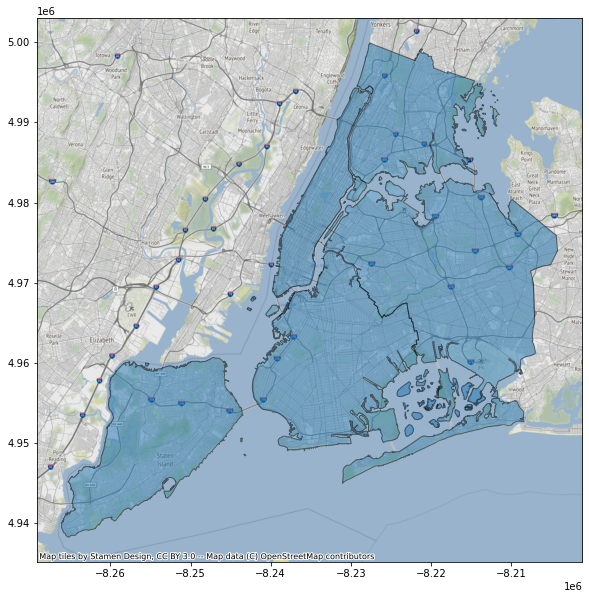

In [61]:
import contextily as ctx
# test = geo_df[geo_df['BORO'] != 'Brooklyn']
test = geo_df[geo_df['Inspection_year'] == 2020]
test = test[test['GRADE'] == 'C']
boros = gpd.read_file(gpd.datasets.get_path("nybb"))
test.crs = 4326
# boros.crs = 4326
test = test.to_crs(epsg=3857)
boros = boros.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(20,10))
boros.plot(ax=ax, alpha=0.5, edgecolor="black")
#test.plot(ax=ax, color="orange")

ctx.add_basemap(ax, zoom = 12)

In [47]:
nbhoods = pd.read_csv('nynta.csv')

nbhoods.head(5)

,BoroCode,the_geom,CountyFIPS,BoroName,NTACode,NTAName,Shape_Leng,Shape_Area
0,3,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,Brooklyn,BK88,Borough Park,39247.227831,5.400502e+07
1,4,MULTIPOLYGON (((-73.80379022888246 40.77561011...,81,Queens,QN51,Murray Hill,33266.904872,5.248828e+07
2,4,MULTIPOLYGON (((-73.8610972440186 40.763664477...,81,Queens,QN27,East Elmhurst,19816.712132,1.972685e+07
3,3,MULTIPOLYGON (((-73.94826499590911 40.63860718...,47,Brooklyn,BK95,Erasmus,18756.701865,1.452260e+07
4,4,MULTIPOLYGON (((-73.75725671509139 40.71813860...,81,Queens,QN07,Hollis,20976.335600,2.288777e+07


In [48]:
import shapely.wkt as wkt
#There is a lot going on here... first rename the column
nbhoods.rename(columns={'NTAName':'neighbourhood'}, inplace=True)

#Then, since this is a csv file, convert the geometry column text into well known text, this will allow you to plot its geometry correctly
nbhoods['geom'] = nbhoods['the_geom'].apply(wkt.loads)

#Now convert the pandas dataframe into a Geopandas GeoDataFrame
nbhoods = gpd.GeoDataFrame(nbhoods, geometry='geom')
nbhoods.crs = 4326
nbhoods= nbhoods.to_crs(epsg=3857)

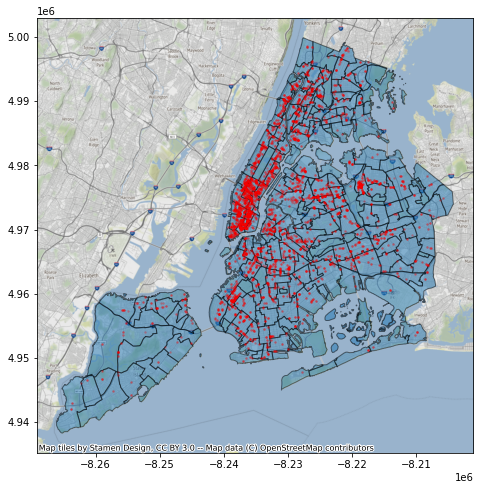

In [74]:
test = geo_df[geo_df['Inspection_year'] == 2019]
test = test[test['GRADE'] == 'B']
test.crs = 4326
fig,ax = plt.subplots(1,1, figsize=(8,8))
test = test.to_crs(epsg=3857)
nbhoods.plot(ax=ax,alpha=0.5, edgecolor="black")
test.plot(ax=ax, marker=".", markersize=10 , color="red", alpha = 0.1)
ctx.add_basemap(ax, zoom = 12)

In [89]:
data3['GRADE'].value_counts()

A    156142
B     25593
C      9754
P      2610
N      2470
Z      1152
G         6
Name: GRADE, dtype: int64

In [90]:
data3['BORO'].value_counts()

Manhattan        77099
Brooklyn         50528
Queens           45088
Bronx            18211
Staten Island     6801
Name: BORO, dtype: int64

In [95]:
data4 = data3[data3['BORO'] == 'Manhattan']

#sum 77099
data4['GRADE'].value_counts()

A    61436
B     9489
C     3836
N     1003
P      922
Z      410
G        3
Name: GRADE, dtype: int64

In [99]:
61436/(61436+9489+3836)

0.8217653589438344

In [111]:
data5 = data3[data3['BORO'] == 'Brooklyn']
data5['GRADE'].value_counts()

A    39771
B     6668
C     2368
P      793
N      637
Z      288
G        3
Name: GRADE, dtype: int64

In [100]:
39771/(39771+6668+2368)

0.8148626221648534

In [96]:
data6 = data3[data3['BORO'] == 'Queens']
data6['GRADE'].value_counts()

A    35594
B     5759
C     2219
N      605
P      605
Z      306
Name: GRADE, dtype: int64

In [101]:
35594/(35594+5759+2219)

0.8169007619572203

In [97]:
data7 = data3[data3['BORO'] == 'Bronx']
data7['GRADE'].value_counts()

A    13849
B     2814
C     1071
P      229
Z      126
N      122
Name: GRADE, dtype: int64

In [102]:
13849/(2814+1071+13849)

0.7809292883726175

In [98]:
data8 = data3[data3['BORO'] == 'Staten Island']
data8['GRADE'].value_counts()

A    5492
B     863
C     260
N     103
P      61
Z      22
Name: GRADE, dtype: int64

In [103]:
5492/(5492+863+260)

0.8302343159486016